In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import japanize_matplotlib # 追加

In [4]:
#csv_file_path = "/home/rest/forpyzx/output/0406_ori_basic_cliff_gadget_full_10000.csv"
csv_file_path = "/home/rest/forpyzx/output/0530_full_with_lookforward_5000_12made.csv"

df = pd.read_csv(csv_file_path)
plot_style = "o"

    p_t  all_gates
1  0.04     5000.0 original 4
    p_t    all_gates
1  0.04  2230.333333 basic 4
    p_t   all_gates
1  0.04  680.666667 clifford 4
    p_t   all_gates
1  0.04  660.333333 full 4
    p_t  all_gates
1  0.04      668.0 clifford_look 4
    p_t  all_gates
1  0.04     5000.0 original 8
    p_t    all_gates
1  0.04  2693.333333 basic 8
    p_t  all_gates
1  0.04     1148.0 clifford 8
    p_t    all_gates
1  0.04  1133.666667 full 8
    p_t    all_gates
1  0.04  1130.666667 clifford_look 8
    p_t  all_gates
1  0.04     5000.0 original 12
    p_t    all_gates
1  0.04  2837.333333 basic 12
    p_t  all_gates
1  0.04     1704.0 clifford 12
    p_t    all_gates
1  0.04  1692.666667 full 12
    p_t  all_gates
1  0.04     1703.0 clifford_look 12


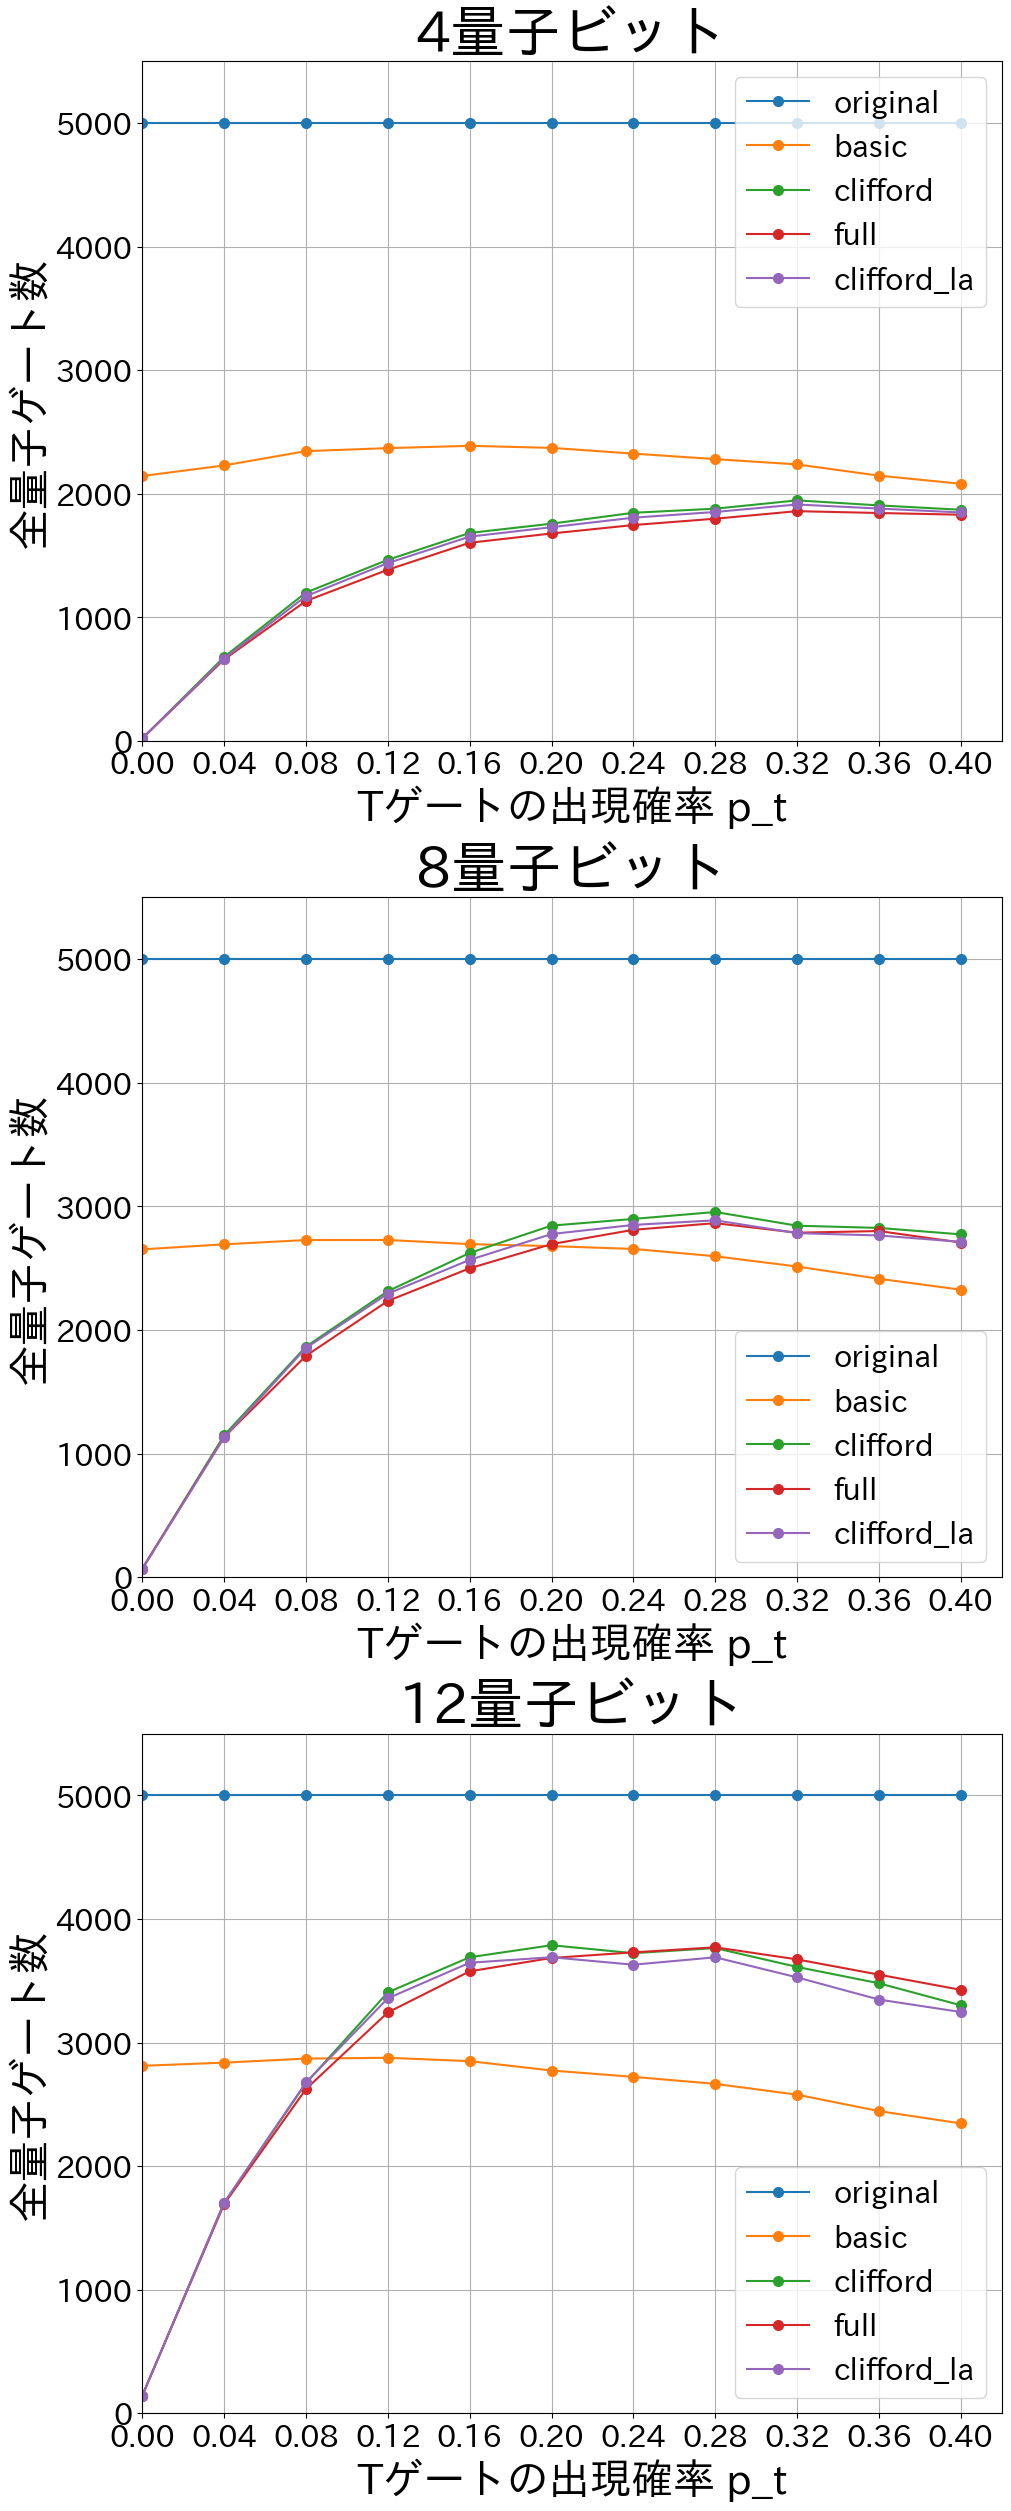

In [11]:
# 全ゲート数
qubits = [4,8,12]
gates = 5000
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford","full","clifford_look"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits),figsize=(10, 25),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
        ax[qubit].set_title(f"{qubits[qubit]}量子ビット",fontsize=40)
        ax[qubit].set_xlabel("Tゲートの出現確率 p_t",fontsize=30)
        ax[qubit].set_ylabel("全量子ゲート数",fontsize=30)
        ax[qubit].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit].set_xticks(p_t_lists)
        ax[qubit].set_ylim(0,gates*1.1)
        ax[qubit].grid(True)
        ax[qubit].tick_params(labelsize=22)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) &  (df["qubit"] == qubits[qubit]) ]

            mean_data = (data.groupby("p_t", as_index=False)["all_gates"].mean())
            print(mean_data[mean_data["p_t"] == 0.04] , optimize ,qubits[qubit])
            if optimize == "clifford_look":
                optimize = "clifford_la"

            ax[qubit].plot(mean_data["p_t"],mean_data["all_gates"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit].legend(fontsize=22)

#plt.savefig("/home/rest/forpyzx/soturon_gazou/all_gates.pdf", format="pdf")
plt.show()

    p_t  one-qubit_gates
1  0.04           3394.0 original 4
    p_t  one-qubit_gates
1  0.04      1211.666667 basic 4
    p_t  one-qubit_gates
1  0.04       356.333333 clifford 4
    p_t  one-qubit_gates
1  0.04       354.666667 full 4
    p_t  one-qubit_gates
1  0.04            362.0 clifford_look 4
    p_t  one-qubit_gates
1  0.04           3409.0 original 8
    p_t  one-qubit_gates
1  0.04           1336.0 basic 8
    p_t  one-qubit_gates
1  0.04       404.333333 clifford 8
    p_t  one-qubit_gates
1  0.04       405.666667 full 8
    p_t  one-qubit_gates
1  0.04       405.666667 clifford_look 8
    p_t  one-qubit_gates
1  0.04      3392.666667 original 12
    p_t  one-qubit_gates
1  0.04      1361.333333 basic 12
    p_t  one-qubit_gates
1  0.04       477.666667 clifford 12
    p_t  one-qubit_gates
1  0.04       476.333333 full 12
    p_t  one-qubit_gates
1  0.04       486.666667 clifford_look 12


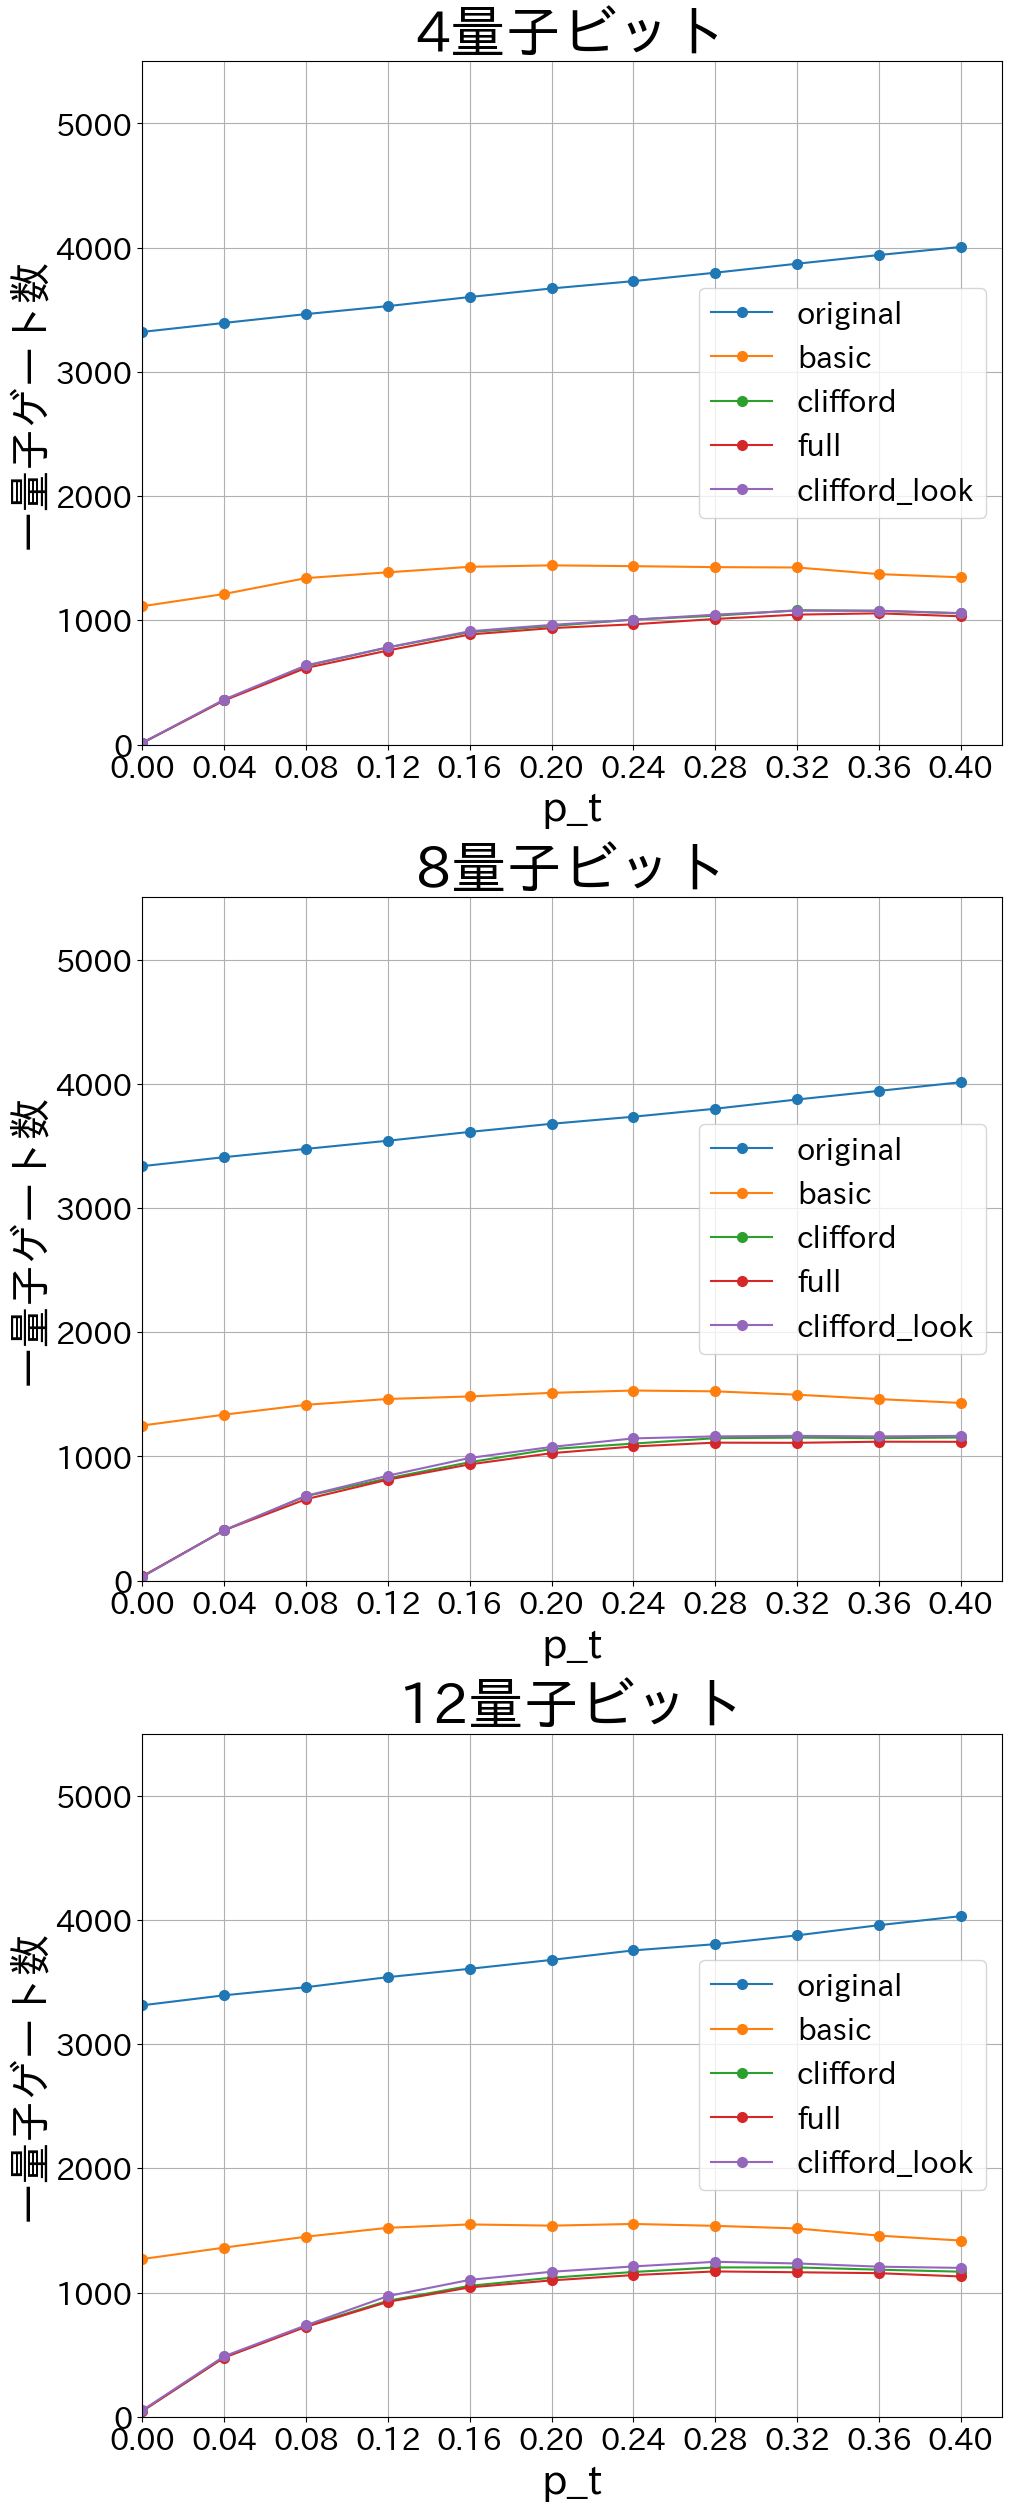

In [ ]:
# 1-ゲート数
qubits = [4,8,12]
gates = 5000
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford","full","clifford_look"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits),figsize=(10, 25),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
        ax[qubit].set_title(f"{qubits[qubit]}量子ビット",fontsize=40)
        ax[qubit].set_xlabel("Tゲートの出現確率 p_t",fontsize=30)
        ax[qubit].set_ylabel("一量子ゲート数",fontsize=30)
        ax[qubit].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit].set_xticks(p_t_lists)
        ax[qubit].set_ylim(0,gates*1.1)
        ax[qubit].grid(True)
        ax[qubit].tick_params(labelsize=22)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) &  (df["qubit"] == qubits[qubit]) ]

            mean_data = (data.groupby("p_t", as_index=False)["one-qubit_gates"].mean())
            print(mean_data[mean_data["p_t"] == 0.04] , optimize ,qubits[qubit])

            if optimize == "clifford_look":
                optimize = "clifford_la"

            ax[qubit].plot(mean_data["p_t"],mean_data["one-qubit_gates"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit].legend(fontsize=22)

#plt.savefig("/home/rest/forpyzx/soturon_gazou/all_gates.pdf", format="pdf")
plt.show()

    p_t  two-qubit gates
1  0.04           1606.0 original 4
    p_t  two-qubit gates
1  0.04      1018.666667 basic 4
    p_t  two-qubit gates
1  0.04       324.333333 clifford 4
    p_t  two-qubit gates
1  0.04       305.666667 full 4
    p_t  two-qubit gates
1  0.04            306.0 clifford_look 4
    p_t  two-qubit gates
1  0.04           1591.0 original 8
    p_t  two-qubit gates
1  0.04      1357.333333 basic 8
    p_t  two-qubit gates
1  0.04       743.666667 clifford 8
    p_t  two-qubit gates
1  0.04            728.0 full 8
    p_t  two-qubit gates
1  0.04            725.0 clifford_look 8
    p_t  two-qubit gates
1  0.04      1607.333333 original 12
    p_t  two-qubit gates
1  0.04           1476.0 basic 12
    p_t  two-qubit gates
1  0.04      1226.333333 clifford 12
    p_t  two-qubit gates
1  0.04      1216.333333 full 12
    p_t  two-qubit gates
1  0.04      1216.333333 clifford_look 12


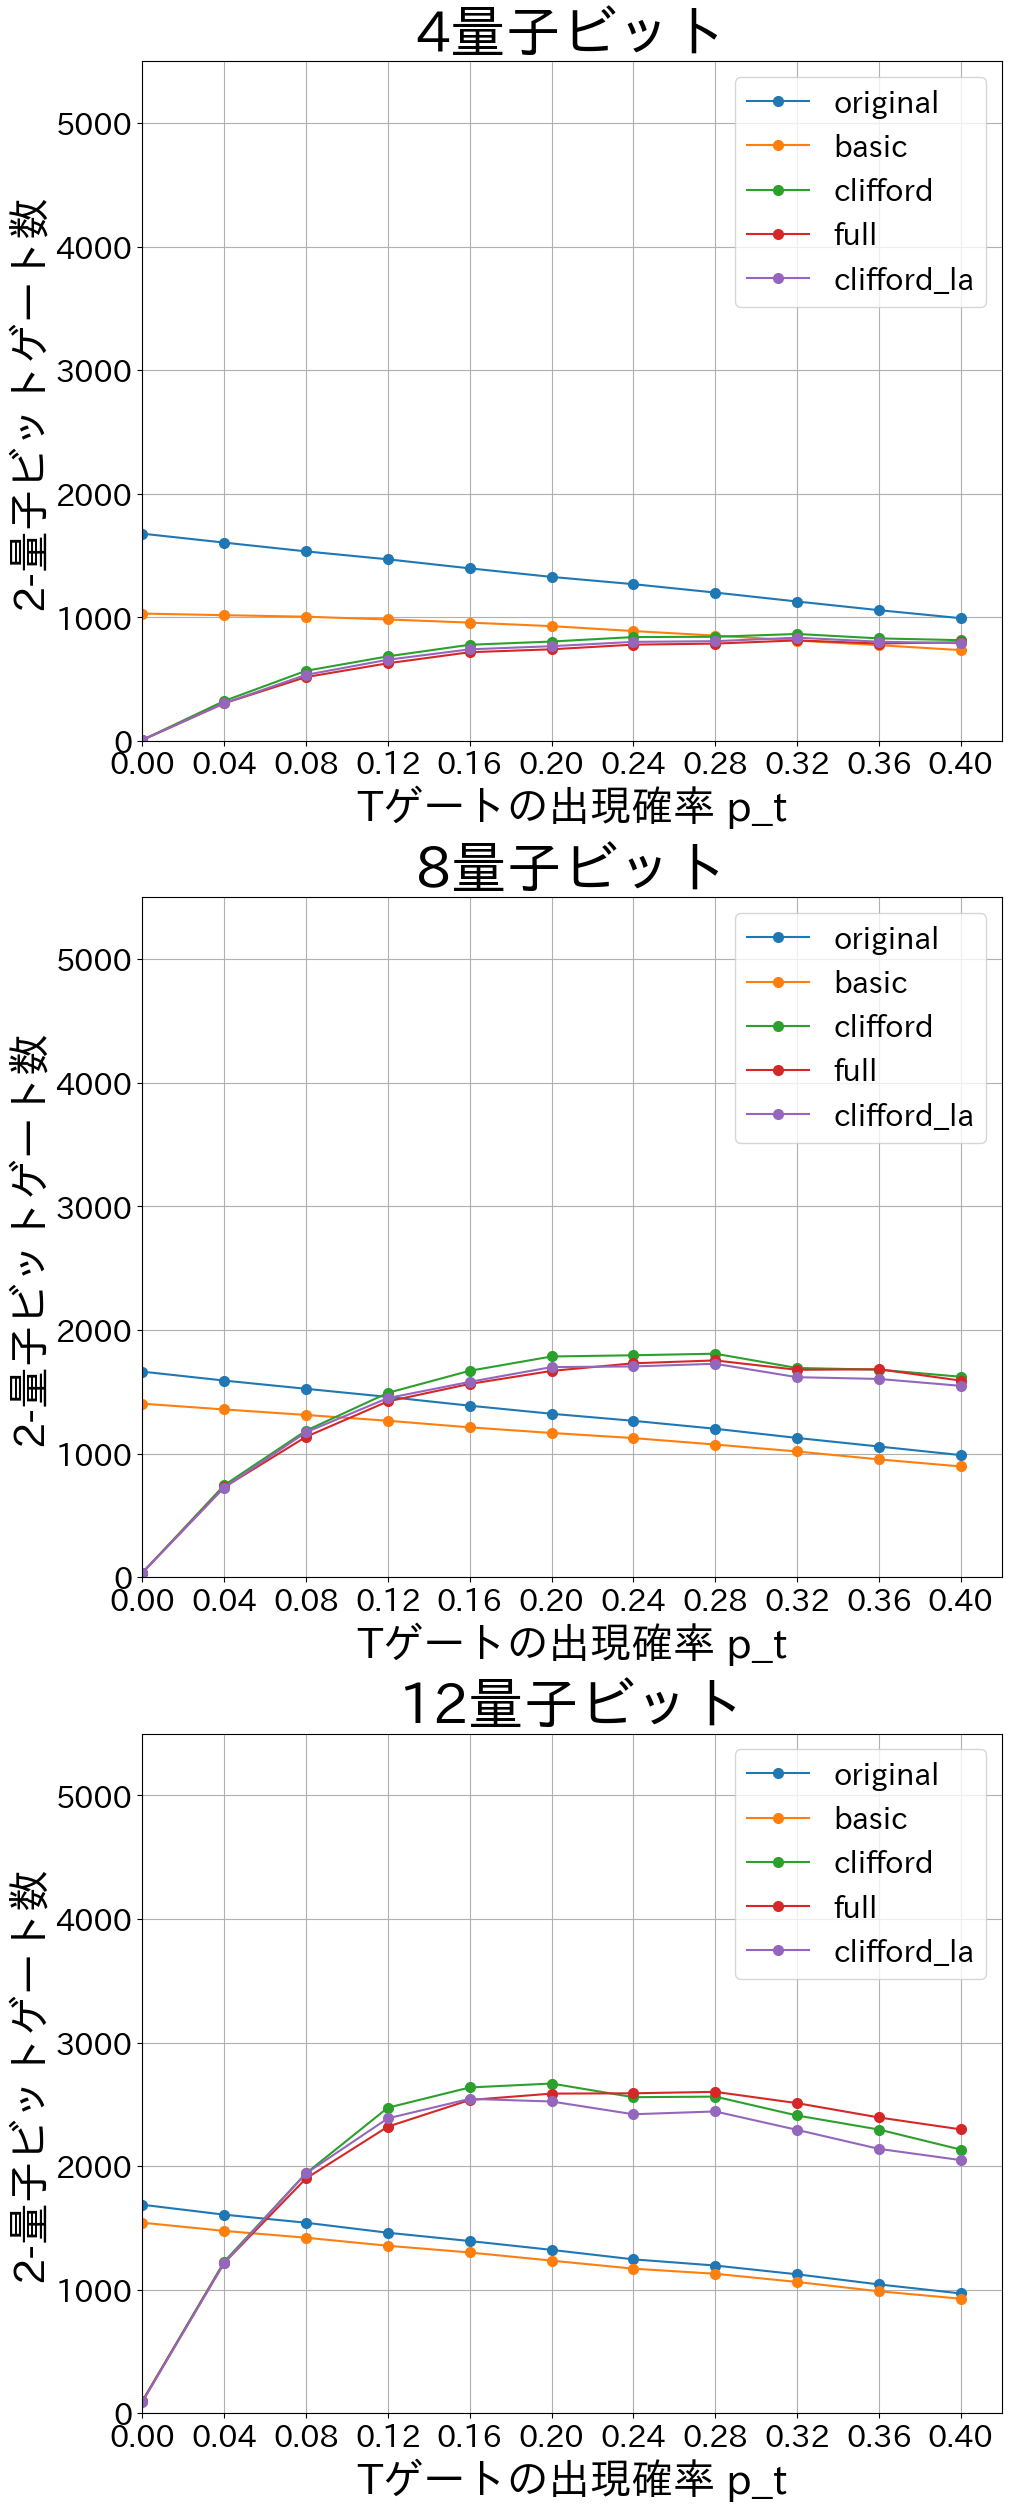

In [10]:
# 全ゲート数
qubits = [4,8,12]
gates = 5000
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford","full","clifford_look"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits),figsize=(10, 25),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
        ax[qubit].set_title(f"{qubits[qubit]}量子ビット",fontsize=40)
        ax[qubit].set_xlabel("Tゲートの出現確率 p_t",fontsize=30)
        ax[qubit].set_ylabel("2-量子ビットゲート数",fontsize=30)
        ax[qubit].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit].set_xticks(p_t_lists)
        ax[qubit].set_ylim(0,gates*1.1)
        ax[qubit].grid(True)
        ax[qubit].tick_params(labelsize=22)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) &  (df["qubit"] == qubits[qubit]) ]

            mean_data = (data.groupby("p_t", as_index=False)["two-qubit gates"].mean())
            print(mean_data[mean_data["p_t"] == 0.04] , optimize ,qubits[qubit])

            if optimize == "clifford_look":
                optimize = "clifford_la"

            ax[qubit].plot(mean_data["p_t"],mean_data["two-qubit gates"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit].legend(fontsize=22)

#plt.savefig("/home/rest/forpyzx/soturon_gazou/all_gates.pdf", format="pdf")
plt.show()